# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов связанных с компьютерным зрением, решением задач ранжирования и т.д.


## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов. Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершенны над ними, а потом уже непосредственно запускать работу над данными. 

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

Выведем строку Hello world, а также версию tensorflow

In [1]:
# !pip install --upgrade pip
# !pip install tensorflow
# !pip install tf-nightly

In [2]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.3.1
TensorFlow 2.0 Hello World


Пример создания тензора - 

In [4]:
A = tf.constant([[3, 2], 
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


Приме сложения тензеров - 

In [5]:
B = tf.constant([[9, 5], 
                 [1, 3],
                 [2, 4]])

AB = tf.concat(values=[A, B], axis=0)
print(AB.numpy())

[[3 2]
 [5 2]
 [9 5]
 [1 3]
 [2 4]]


Пример изменения размерности тензора - 

In [6]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [2, 4]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2]
 [9 5 1 3]]


Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [7]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)


tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


In [8]:
x = tf.matmul([[5]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[10 15]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


In [9]:
import numpy as np

ndarray = np.ones([3, 3])

print("превратим numpy arrays в Tensors ")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("добавим к тензору 1 ")
print(np.add(tensor, 1))

print(" .numpy() превратим тензор в  numpy array")
print(tensor.numpy())

превратим numpy arrays в Tensors 
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
добавим к тензору 1 
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
 .numpy() превратим тензор в  numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [10]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))


есть ли доступные GPU: 
[]
тензор на GPU #0:  
False


In [11]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 циклов: {:0.2f}ms".format(1000*result))

# исполнение CPU
print(" CPU работает:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print(" какой GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

 CPU работает:
10 циклов: 79.03ms


В отличие от графического процессора, использование TPU требует явного подключения к работнику TPU. Поэтому необходимо настроить свое обучение и определение логического вывода, чтобы наблюдать ускорение

пример работы с TPU на будущее https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpu_and_keras.ipynb

Функции tensorflow призваны ускорить вычисления, давайте посмотрим на следующий пример - 

In [12]:
from tensorflow.keras.datasets import mnist


(train_images,train_labels),(test_images,testn_labels)=mnist.load_data()

# Нормализация.
train_images = (train_images / 255) * 2 - 1
test_images = (test_images / 255) * 2 - 1

# векторизация.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)



11493376/11490434 [==============================] - 6s 1us/step
(60000, 784)
(10000, 784)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [14]:
import matplotlib.pyplot as plt


In [15]:
bigger_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax')
])

bigger_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2, validation_split=0.2
)


Epoch 1/5
24000/24000 [==============================] - 63s 3ms/step - loss: 0.4632 - accuracy: 0.8634 - val_loss: 0.2931 - val_accuracy: 0.9153
Epoch 2/5
24000/24000 [==============================] - 58s 2ms/step - loss: 0.3198 - accuracy: 0.9079 - val_loss: 0.4517 - val_accuracy: 0.8773
Epoch 3/5
24000/24000 [==============================] - 57s 2ms/step - loss: 0.2902 - accuracy: 0.9171 - val_loss: 0.2908 - val_accuracy: 0.9206
Epoch 4/5
24000/24000 [==============================] - 58s 2ms/step - loss: 0.2689 - accuracy: 0.9231 - val_loss: 0.2284 - val_accuracy: 0.9356
Epoch 5/5
24000/24000 [==============================] - 56s 2ms/step - loss: 0.2573 - accuracy: 0.9267 - val_loss: 0.3564 - val_accuracy: 0.9016


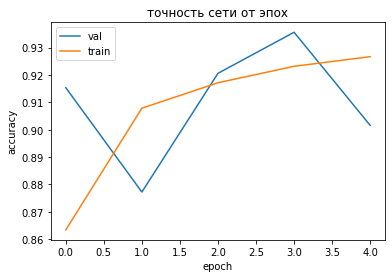

In [17]:
plt.plot(bigger_history.history['val_accuracy'] ,label='val')
plt.plot(bigger_history.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [18]:
bigger_model2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax')
])

bigger_model2.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_history2 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2
)

Epoch 1/5
24/24 [==============================] - 1s 24ms/step - loss: 1.4726 - accuracy: 0.6193 - val_loss: 0.4443 - val_accuracy: 0.8662
Epoch 2/5
24/24 [==============================] - 0s 21ms/step - loss: 0.3790 - accuracy: 0.8879 - val_loss: 0.2877 - val_accuracy: 0.9166
Epoch 3/5
24/24 [==============================] - 0s 20ms/step - loss: 0.2711 - accuracy: 0.9212 - val_loss: 0.2283 - val_accuracy: 0.9345
Epoch 4/5
24/24 [==============================] - 0s 20ms/step - loss: 0.2153 - accuracy: 0.9381 - val_loss: 0.1867 - val_accuracy: 0.9477
Epoch 5/5
24/24 [==============================] - 0s 20ms/step - loss: 0.1764 - accuracy: 0.9491 - val_loss: 0.1638 - val_accuracy: 0.9552


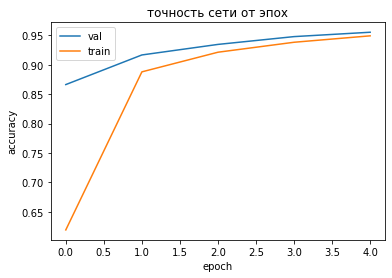

In [19]:
plt.plot(bigger_history2.history['val_accuracy'] ,label='val')
plt.plot(bigger_history2.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [20]:
bigger_history3 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2
)

Epoch 1/5
24/24 [==============================] - 1s 21ms/step - loss: 0.1502 - accuracy: 0.9569 - val_loss: 0.1456 - val_accuracy: 0.9598
Epoch 2/5
24/24 [==============================] - 0s 20ms/step - loss: 0.1307 - accuracy: 0.9622 - val_loss: 0.1328 - val_accuracy: 0.9605
Epoch 3/5
24/24 [==============================] - 0s 20ms/step - loss: 0.1131 - accuracy: 0.9664 - val_loss: 0.1191 - val_accuracy: 0.9658
Epoch 4/5
24/24 [==============================] - 0s 20ms/step - loss: 0.0994 - accuracy: 0.9707 - val_loss: 0.1115 - val_accuracy: 0.9697
Epoch 5/5
24/24 [==============================] - 0s 19ms/step - loss: 0.0863 - accuracy: 0.9748 - val_loss: 0.1037 - val_accuracy: 0.9705


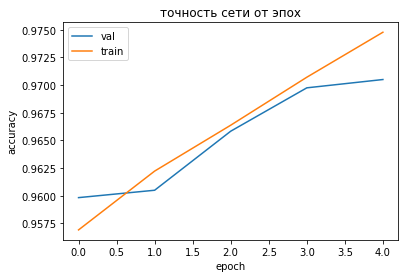

In [21]:
plt.plot(bigger_history3.history['val_accuracy'] ,label='val')
plt.plot(bigger_history3.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [22]:
bigger_history3 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=15,
  batch_size=2000, validation_split=0.2
)

Epoch 1/15
24/24 [==============================] - 1s 21ms/step - loss: 0.0772 - accuracy: 0.9778 - val_loss: 0.1043 - val_accuracy: 0.9694
Epoch 2/15
24/24 [==============================] - 0s 20ms/step - loss: 0.0684 - accuracy: 0.9809 - val_loss: 0.0972 - val_accuracy: 0.9722
Epoch 3/15
24/24 [==============================] - 0s 20ms/step - loss: 0.0624 - accuracy: 0.9819 - val_loss: 0.0982 - val_accuracy: 0.9713
Epoch 4/15
24/24 [==============================] - 1s 21ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 0.0961 - val_accuracy: 0.9715
Epoch 5/15
24/24 [==============================] - 1s 22ms/step - loss: 0.0522 - accuracy: 0.9855 - val_loss: 0.0893 - val_accuracy: 0.9739
Epoch 6/15
24/24 [==============================] - 1s 22ms/step - loss: 0.0469 - accuracy: 0.9869 - val_loss: 0.0895 - val_accuracy: 0.9753
Epoch 7/15
24/24 [==============================] - 1s 21ms/step - loss: 0.0420 - accuracy: 0.9886 - val_loss: 0.0898 - val_accuracy: 0.9733
Epoch 8/15
24

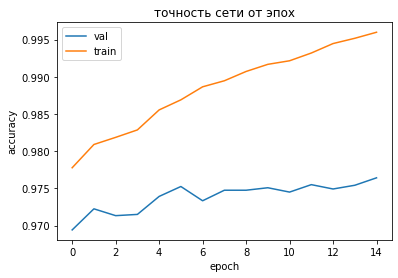

In [23]:
plt.plot(bigger_history3.history['val_accuracy'] ,label='val')
plt.plot(bigger_history3.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

### Оптимизаторы

In [24]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

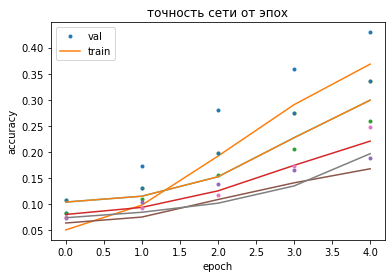

In [25]:
for i in [0,1,2,3,4]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(10, activation='sigmoid')
                              ])

  bigger_model4.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10),epochs=5,
                                        batch_size=20000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [26]:
to_categorical(train_labels,10).shape

(60000, 10)

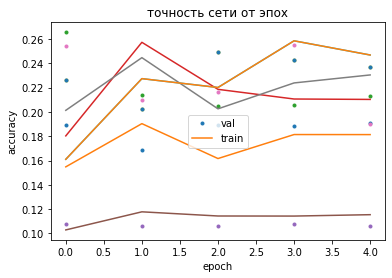

In [27]:
for i in [0,1,2,3,4]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(10, activation='sigmoid')
                              ])

  bigger_model4.compile(optimizer='Adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10),epochs=5,
                                        batch_size=20000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

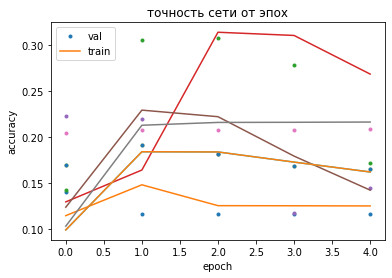

In [28]:
for i in [0,1,2,3,4]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(10, activation='sigmoid')
                              ])

  bigger_model4.compile( 
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10),epochs=5,
                                        batch_size=20000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

Параметры оптимизаторов


Задача на один класс: to_categorical(train_labels,10)[:,0] 

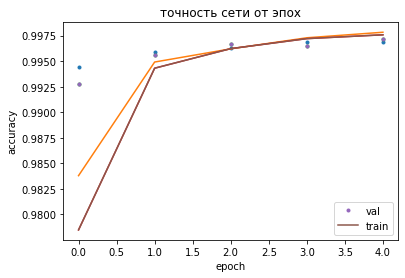

In [29]:
for i in [0,1]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(1, activation='sigmoid')  # нейронов на выходе 1 - для одного класса один выход ( бинарный классификатор)
                              ])

  bigger_model4.compile(optimizer= Adam(learning_rate=0.0001, beta_1=0.89) ,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [30]:
  bigger_history4 = bigger_model4.fit( train_images[:100,:], to_categorical(train_labels[:100],10)[:,0],epochs=5,
                                        batch_size=2, validation_split=0.2, verbose = 1
                                      )

Epoch 1/5
40/40 [==============================] - 0s 5ms/step - loss: 4.8477e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2/5
40/40 [==============================] - 0s 3ms/step - loss: 1.1152e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 0s 3ms/step - loss: 5.8952e-05 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 0s 3ms/step - loss: 4.6521e-05 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 5/5
40/40 [==============================] - 0s 3ms/step - loss: 3.8450e-05 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000


In [31]:
train_images[:10,:].shape

(10, 784)

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [32]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [33]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
len(train_labels)

60000

In [37]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [38]:
test_images.shape

(10000, 28, 28)

In [39]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

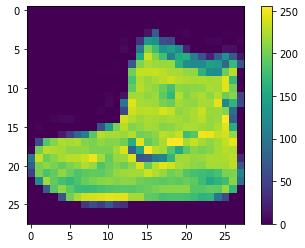

In [40]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [41]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

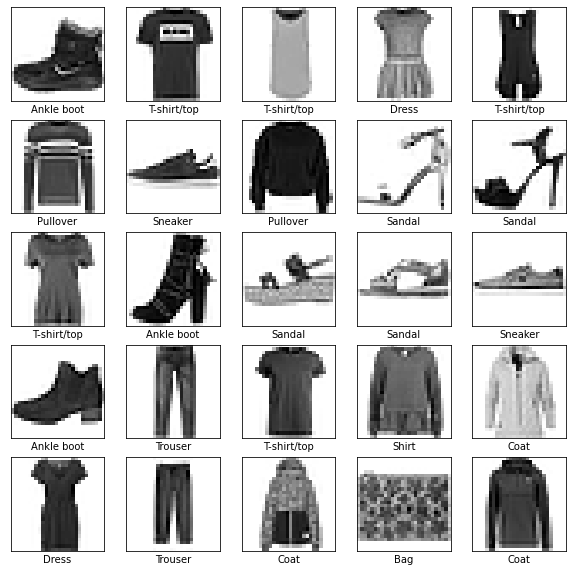

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [44]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [46]:
model.fit(train_images, train_labels, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 0s 748us/step - loss: 0.5342 - accuracy: 0.8153
Epoch 2/3
600/600 [==============================] - 0s 783us/step - loss: 0.4004 - accuracy: 0.8601
Epoch 3/3
600/600 [==============================] - 0s 810us/step - loss: 0.3614 - accuracy: 0.8720


In [47]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3936 - accuracy: 0.8595

Test accuracy: 0.859499990940094


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [48]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [49]:
predictions = probability_model.predict(test_images)

In [50]:
predictions[0]

array([1.0231744e-05, 5.1883962e-08, 5.6788681e-06, 5.7821183e-07,
       1.3652673e-06, 1.8059511e-02, 2.4678466e-05, 2.7640292e-02,
       4.5353628e-04, 9.5380414e-01], dtype=float32)

In [51]:
np.argmax(predictions[0])

9

In [52]:
test_labels[0]

9

In [53]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

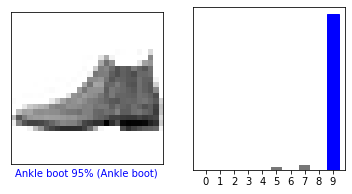

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

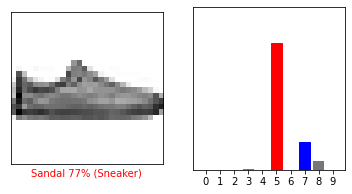

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

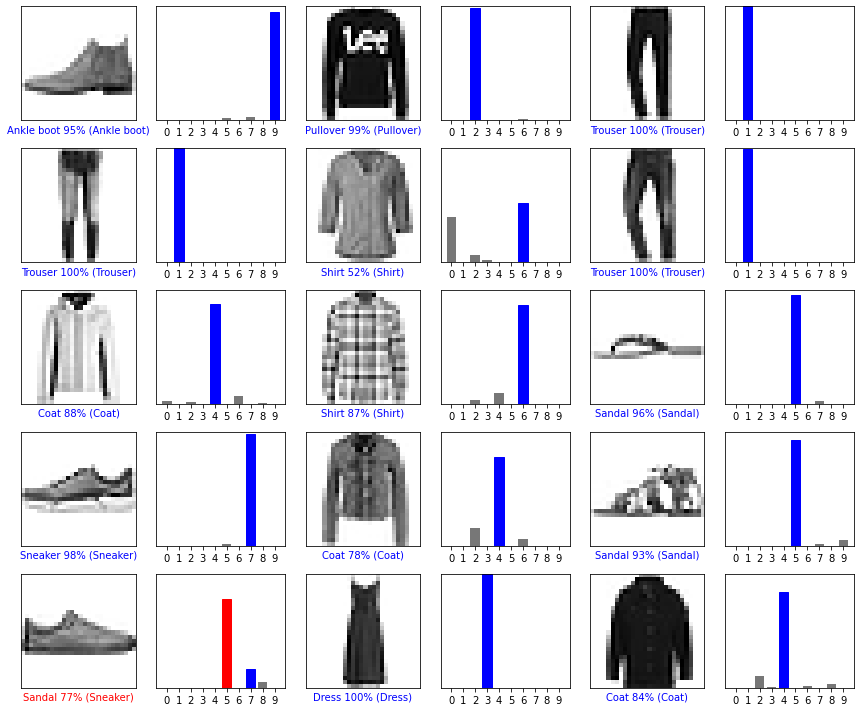

In [56]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [57]:
img1 = test_images[1]

print(img1.shape)

(28, 28)


In [58]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img1,0))

print(img.shape)

(1, 28, 28)


In [59]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.7537891e-04 3.1848153e-08 9.8695636e-01 5.5077767e-06 4.4532702e-03
  1.3867916e-11 8.4015746e-03 1.6058714e-10 7.8861713e-06 2.0886100e-11]]


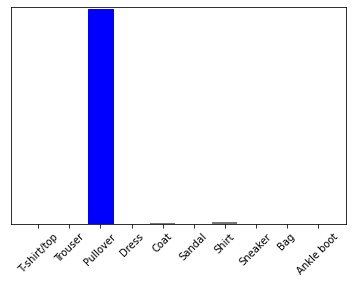

In [60]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [61]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание


Реализуем одинаковые смети в разном стиле:
- model1 - линейная модель через список
- model2 - линейная модель через добавление слоев по очереди
- model3 - модель через функциональное описание

У всех 3-х сетей последний слой линейный (это не правильно для классификации и сделано, что бы модель была совсем простой)




In [62]:
# заполняем модель списком
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# заполняем модель , добавляя слои последовательно 
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28, 28)))
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))


# Заполняем модель, формируя граф передачи тензоров
x_input = keras.layers.Input(shape=(28,28))
x3 = keras.layers.Flatten()(x_input)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x_output = keras.layers.Dense(10, activation='softmax')(x3)
model3=keras.models.Model(x_input,x_output)

model1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist1=model1.fit(train_images, train_labels, epochs=5)
hist2=model2.fit(train_images, train_labels, epochs=5)
hist3=model3.fit(train_images, train_labels, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 1s 618us/step - loss: 2.0254 - accuracy: 0.4777
Epoch 2/5
1875/1875 [==============================] - 1s 585us/step - loss: 1.8631 - accuracy: 0.6315
Epoch 3/5
1875/1875 [==============================] - 1s 587us/step - loss: 1.7949 - accuracy: 0.7027
Epoch 4/5
1875/1875 [==============================] - 1s 601us/step - loss: 1.7717 - accuracy: 0.7158
Epoch 5/5
1875/1875 [==============================] - 1s 589us/step - loss: 1.7596 - accuracy: 0.7223
Epoch 1/5
1875/1875 [==============================] - 2s 965us/step - loss: 1.6802 - accuracy: 0.7851
Epoch 2/5
1875/1875 [==============================] - 2s 950us/step - loss: 1.6216 - accuracy: 0.8406
Epoch 3/5
1875/1875 [==============================] - 2s 953us/step - loss: 1.6132 - accuracy: 0.8480
Epoch 4/5
1875/1875 [==============================] - 2s 981us/step - loss: 1.6052 - accuracy: 0.8558
Epoch 5/5
1875/1875 [==============================] - 2s 979us/step - lo

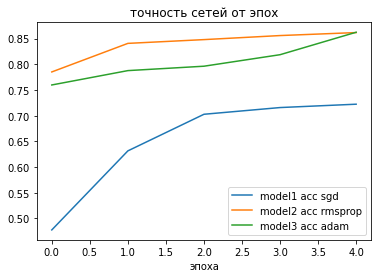

In [63]:
plt.plot(hist1.history['accuracy'],label='model1 acc sgd')
plt.plot(hist2.history['accuracy'],label='model2 acc rmsprop')
plt.plot(hist3.history['accuracy'],label ='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

In [64]:
# сохранить модели на диск.
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')
# прочитать модели с диска (перед этим, нужно положить их в каталог для работы виртуальной машины Колаборатории):
# model.load_weights('model.h5')

Выгрузим на локальную машину нашу модель

In [66]:
# from google.colab import files

# files.download('model1.h5')

In [67]:
x3

<tf.Tensor 'dense_63/Relu:0' shape=(None, 256) dtype=float32>

Сделаем предсказание на тестовом изображении

In [68]:
y_pred = model3.predict(test_images)
y_pred_arg = np.argmax(y_pred, axis=1)

Отобразим значения на выходах сети (10 выходов - 10 точек графика)

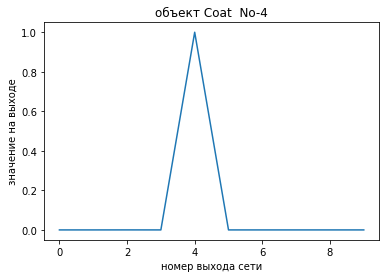

In [69]:
N = 10 
plt.plot(y_pred[N,:])
plt.title('объект ' +class_names[test_labels[N]]+ '  No-'+str(test_labels[N]))
plt.xlabel('номер выхода сети')
plt.ylabel('значение на выходе')
plt.show()

In [70]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 1.6096 - accuracy: 0.8523


### **Ансамбль сетей**

Использование функционального API для построения сложных сетей

In [71]:
input1 = keras.layers.Input(shape=(28, 28))
x1= keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 =keras.layers.Dense(10)(x1)

model11 =keras.models.Model(inputs=input1,outputs=x1)


x2= keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2=keras.layers.Dense(10)(x2)

model22 =keras.models.Model(inputs=input1,outputs=x2)

x3= keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3=keras.layers.Dense(10)(x3)


model33 =keras.models.Model(inputs=input1,outputs=x3)


out_all = keras.layers.Average()([model11.output,model22.output,model33.output])
out_all = keras.layers.Softmax()(out_all)
model_all=keras.models.Model(inputs =[input1],outputs =out_all)
model_all.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

In [72]:
tf.keras.optimizers.Adam()

In [73]:
model_all.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 784)          0           input_2[0][0]                    
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 784)          0           input_2[0][0]                    
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 784)          0           input_2[0][0]                    
_______________________________________________________________________________________

In [74]:
from tensorflow.keras.utils import plot_model

In [75]:
plot_model(model_all,to_file='new_model-all.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [76]:
predictions_single=model_all.predict(img)

print(predictions_single)

[[1.7188736e-20 1.4249278e-17 1.0000000e+00 4.6438654e-19 7.6412219e-12
  1.1511844e-18 5.9877415e-16 9.5818887e-33 1.5624010e-16 4.4808834e-31]]


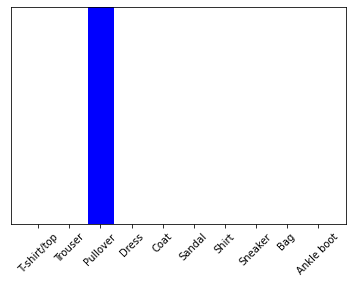

In [77]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [78]:
test_loss, test_acc = model_all.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 1.6133 - accuracy: 0.8482


## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston (или Fashion_Mnist). 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>

## Дополнительные материалы

<ol>
    <li>www.tensorflow.org/api_docs</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>